<a href="https://colab.research.google.com/github/thibastos0/Fatec-DSM/blob/main/Alura/Aulas_Imersao_dados_com_Python_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd

In [60]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [61]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [63]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [64]:
df.shape

(133349, 11)

In [65]:
linhas, colunas = df.shape[0], df.shape[1]
print("linhas: ", linhas)
print("colunas: ", colunas)

linhas:  133349
colunas:  11


In [66]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [67]:
colunas_traduzidas = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}
#df.rename(columns=colunas_traduzidas, inplace=True)
df = df.rename(columns=colunas_traduzidas)
print("Novas colunas do DataFrame:")
print(df.columns)

Novas colunas do DataFrame:
Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')


In [68]:
df["senioridade"].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [69]:
df["contrato"].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [70]:
df["remoto"].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [71]:
df["tamanho_empresa"].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [72]:
df['senioridade'] = df['senioridade'].replace({
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
})

print("Novas categorias da coluna 'senioridade':")
df['senioridade'].value_counts()

Novas categorias da coluna 'senioridade':


,count
senioridade,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [73]:
df['contrato'] = df['contrato'].replace({
    'FT': 'Tempo Integral',
    'CT': 'Contrato',
    'PT': 'Tempo Parcial',
    'FL': 'Freelance'
})

print("Novas categorias da coluna 'contrato':")
df['contrato'].value_counts()

Novas categorias da coluna 'contrato':


,count
contrato,
Tempo Integral,132563
Contrato,394
Tempo Parcial,376
Freelance,16


In [74]:
df['tamanho_empresa'] = df['tamanho_empresa'].replace({
    'M': 'Médio',
    'L': 'Grande',
    'S': 'Pequeno'
})

print("Novas categorias da coluna 'tamanho_empresa':")
df['tamanho_empresa'].value_counts()

Novas categorias da coluna 'tamanho_empresa':


,count
tamanho_empresa,
Médio,129561
Grande,3574
Pequeno,214


In [75]:
df['remoto'] = df['remoto'].replace({
    0: 'Presencial',
    100: 'Remoto',
    50: 'Híbrido'
})

print("Novas categorias da coluna 'remoto':")
df['remoto'].value_counts()

Novas categorias da coluna 'remoto':


,count
remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [76]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [77]:
df.describe(include="object")

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Médio
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [78]:
df.describe()

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


In [79]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [80]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [81]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [82]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [83]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Médio
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Médio
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Médio
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Médio
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Médio
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Médio
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Médio
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [84]:
import numpy as np

#dataframe teste para simular o tratamento com uma base de exemplo
df_salarios = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    'salario': [4000, np.nan, 5000, np.nan, 100000]
})
# calcula a média salarial e substitui os nulos pela média, arredondando os valores
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))
# calcula a mediana e substui os vamoles nulos pela mediana
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

In [85]:
df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [86]:
df_temperaturas = pd.DataFrame({
    'Dia': ['Segunga', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    'Temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas["preenchido_ffill"] = df_temperaturas["Temperatura"].ffill()
df_temperaturas

,Dia,Temperatura,preenchido_ffill
0,Segunga,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [87]:
df_temperaturas = pd.DataFrame({
    'Dia': ['Segunga', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    'Temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas["preenchido_bfill"] = df_temperaturas["Temperatura"].bfill()
df_temperaturas

,Dia,Temperatura,preenchido_bfill
0,Segunga,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [88]:
df_cidades = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    'cidade': ['São Paulo', np.nan, 'Curitiba', np.nan, "Belém"]
})

df_cidades['cidade_preenchida'] = df_cidades["cidade"].fillna("Não informado")
df_cidades

,nome,cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não informado
4,Val,Belém,Belém


In [89]:
df_limpo = df.dropna()

In [90]:
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [91]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [92]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [93]:
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))

In [94]:
df_limpo

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio
...,...,...,...,...,...,...,...,...,...,...,...
133344,2020,Senior,Tempo Integral,Data Scientist,412000,USD,412000,US,Remoto,US,Grande
133345,2021,Pleno,Tempo Integral,Principal Data Scientist,151000,USD,151000,US,Remoto,US,Grande
133346,2020,Junior,Tempo Integral,Data Scientist,105000,USD,105000,US,Remoto,US,Pequeno
133347,2020,Junior,Contrato,Business Data Analyst,100000,USD,100000,US,Remoto,US,Grande


<Axes: title={'center': 'Distribuição de senioridade'}, xlabel='senioridade'>

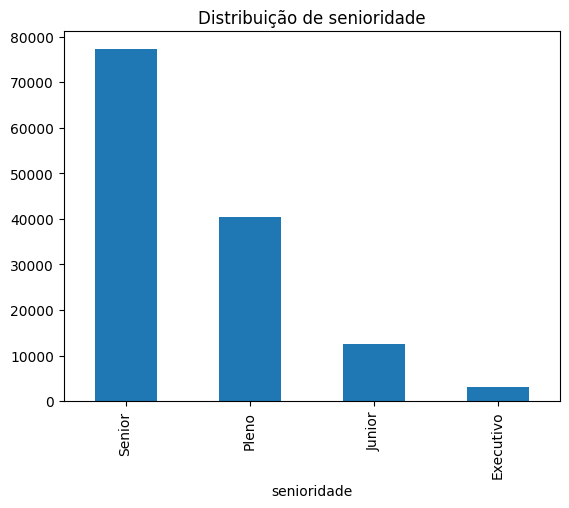

In [95]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title='Distribuição de senioridade')

<Axes: xlabel='senioridade', ylabel='usd'>

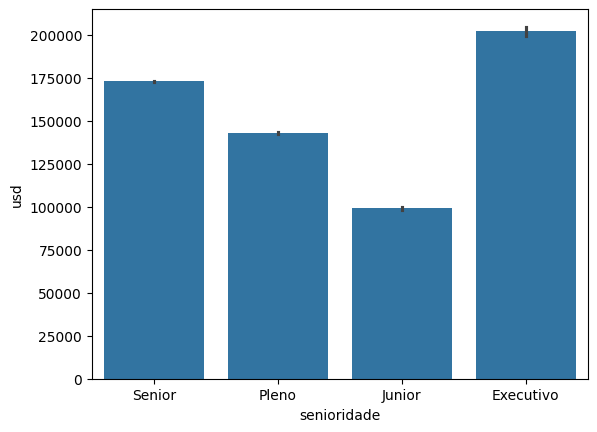

In [96]:
import seaborn as sns
sns.barplot(data=df_limpo, x='senioridade', y='usd')

In [97]:
import matplotlib.pyplot as plt

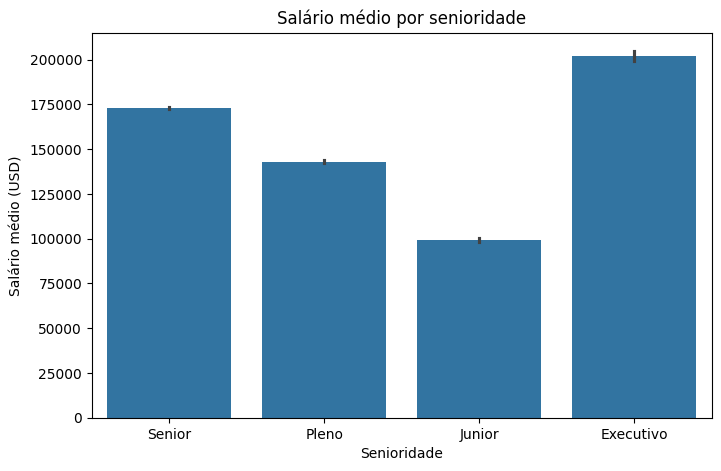

In [98]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd')
plt.title('Salário médio por senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio (USD)')
plt.show()

In [99]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

,usd
senioridade,
Executivo,202027.667813
Senior,172850.838301
Pleno,143044.845979
Junior,99034.963267


In [100]:
ordem_df_limpo = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index

In [101]:
ordem_df_limpo

Index(['Executivo', 'Senior', 'Pleno', 'Junior'], dtype='object', name='senioridade')

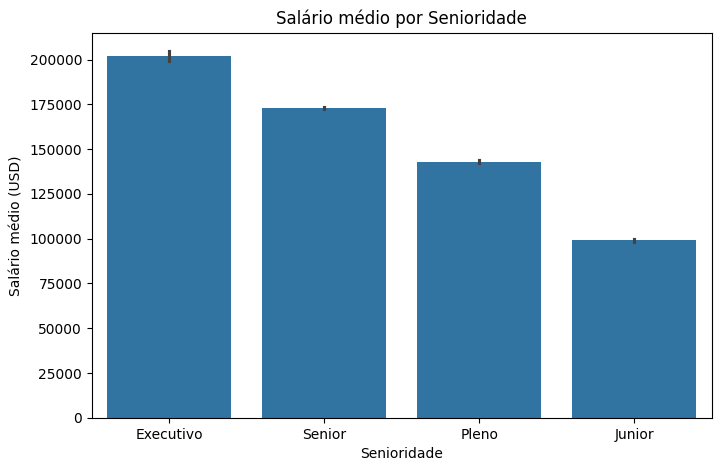

In [102]:
plt.figure(figsize=(8, 5))

# Deixando o gráfico na ordem proposta por ordem_df_limpo
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem_df_limpo)
plt.title('Salário médio por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio (USD)')

plt.show()

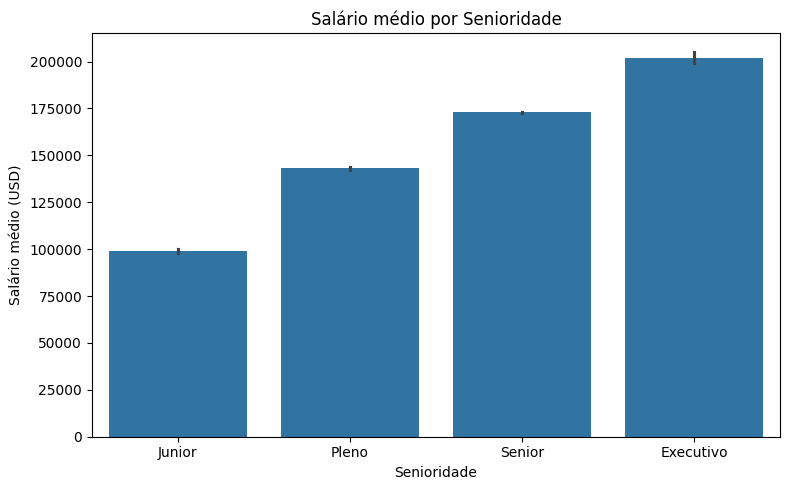

In [103]:
# Invertendo a ordem
ordem_df_limpo = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=True).index

# Criando uma figura com somente um subplots (1 linha, 1 coluna), fins de teste
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# --- Gráfico: Salário médio por Senioridade ---
# Passando o eixo único (ax) para o Seaborn
sns.barplot(data=df_limpo, x='senioridade', y='usd', ax=ax, order=ordem_df_limpo)
ax.set_title('Salário médio por Senioridade')
ax.set_xlabel('Senioridade')
ax.set_ylabel('Salário médio (USD)')

plt.tight_layout()
plt.show()


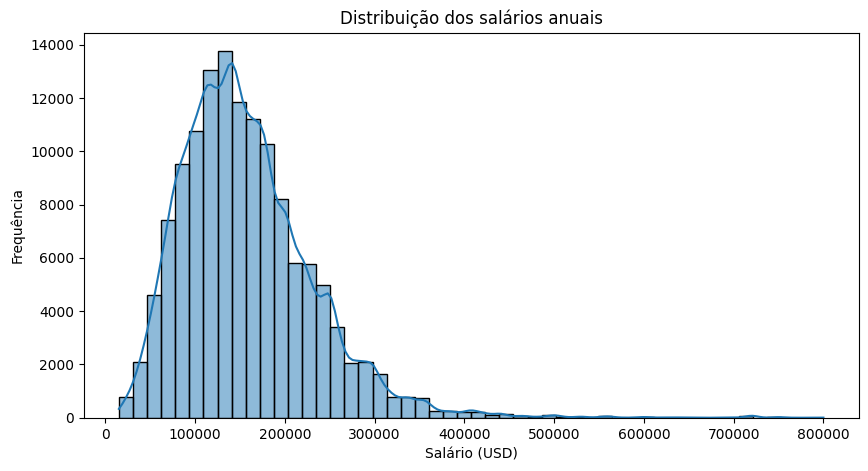

In [104]:
plt.figure(figsize=(10, 5))
sns.histplot(df_limpo['usd'], bins= 50, kde=True)
plt.title('Distribuição dos salários anuais')
plt.xlabel('Salário (USD)')
plt.ylabel('Frequência')
plt.show()


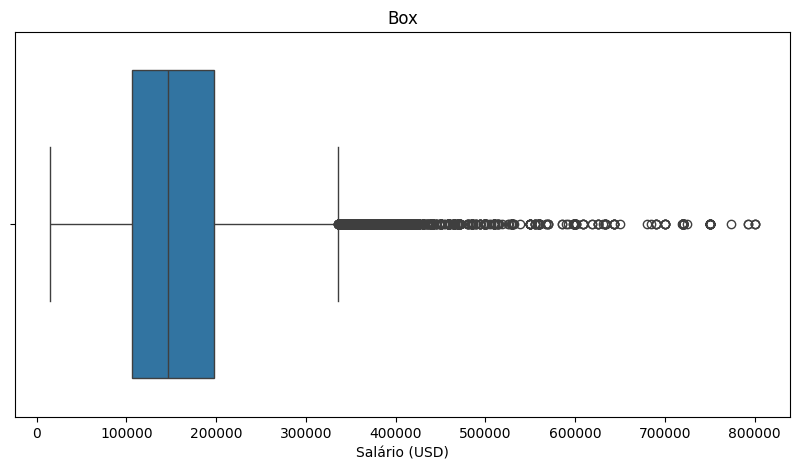

In [105]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_limpo['usd'])
plt.title('Box')
plt.xlabel('Salário (USD)')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

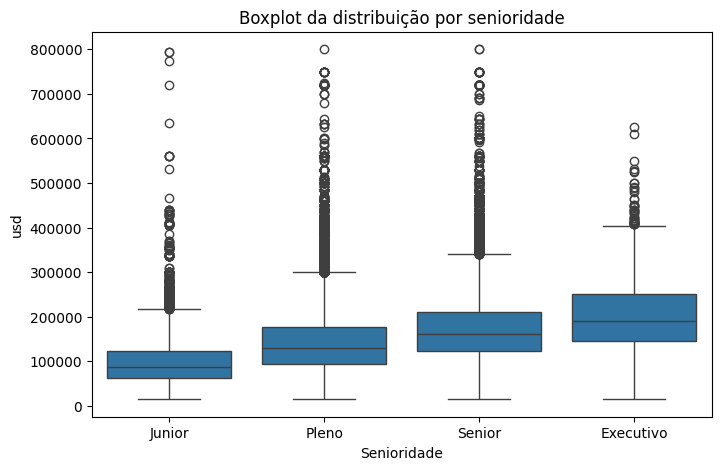

In [106]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_limpo, x='senioridade', y='usd', order=ordem_senioridade)
plt.title('Boxplot da distribuição por senioridade')
plt.xlabel('Senioridade')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

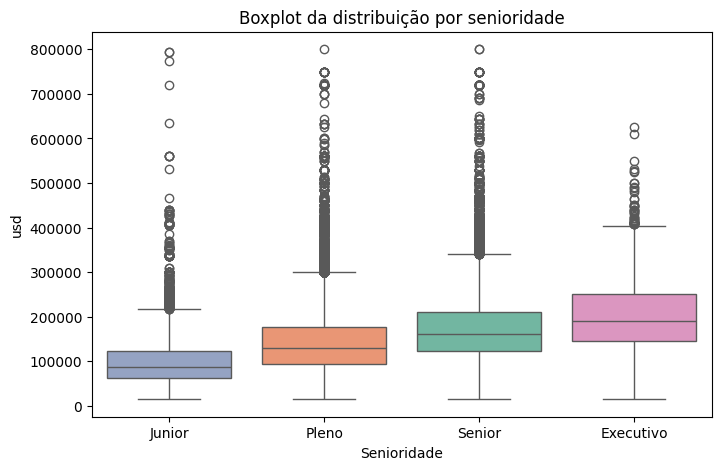

In [107]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_limpo, x='senioridade', y='usd', order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title('Boxplot da distribuição por senioridade')
plt.xlabel('Senioridade')
plt.show

In [108]:
import plotly.express as px

In [109]:
# Calcular a média salarial por senioridade
media_salario_senioridade = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()

# Criar o gráfico de barras com Plotly Express
fig = px.bar(
    media_salario_senioridade,
    x='senioridade',
    y='usd',
    title='Média Salarial por Senioridade',
    labels={'senioridade': 'Nível de Senioridade', 'usd': 'Salário Médio (USD)'},
    color='senioridade', # Opcional: Adiciona cor diferente para cada senioridade
    color_discrete_sequence=px.colors.qualitative.Set2 # Opcional: Define uma paleta de cores
)

# Exibir o gráfico
fig.show()

In [110]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(
    remoto_contagem,
    names='tipo_trabalho',
    values='quantidade',
    title='Porporção dos tipos de trabalho',
    labels={'tipo_trabalho': 'Tipos de trabalho', 'quantidade': 'Quantidade'},
    color='tipo_trabalho',
    color_discrete_sequence=px.colors.qualitative.Set2,
    hole=0.5
)

fig.update_traces(textinfo='percent+label')
# Exibir o gráfico
fig.show()

In [111]:
df_limpo
# df_limpo['cargo'].value_counts()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio
...,...,...,...,...,...,...,...,...,...,...,...
133344,2020,Senior,Tempo Integral,Data Scientist,412000,USD,412000,US,Remoto,US,Grande
133345,2021,Pleno,Tempo Integral,Principal Data Scientist,151000,USD,151000,US,Remoto,US,Grande
133346,2020,Junior,Tempo Integral,Data Scientist,105000,USD,105000,US,Remoto,US,Pequeno
133347,2020,Junior,Contrato,Business Data Analyst,100000,USD,100000,US,Remoto,US,Grande


In [112]:
df_limpo_paises_iso3 = df.dropna()
df_limpo_paises_iso3 = df_limpo_paises_iso3.assign(ano = df_limpo_paises_iso3['ano'].astype('int64'))

df_limpo_paises_iso3.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [113]:
# Mapeamento dos códigos de país para nomes em português brasileiro
pt_country_names = {
    'US': 'Estados Unidos',
    'AU': 'Austrália',
    'GB': 'Reino Unido',
    'CA': 'Canadá',
    'DE': 'Alemanha',
    'FR': 'França',
    'IN': 'Índia',
    'ES': 'Espanha',
    'BR': 'Brasil',
    'PT': 'Portugal',
    'MX': 'México',
    'CH': 'Suíça',
    'IT': 'Itália',
    'JP': 'Japão',
    'NZ': 'Nova Zelândia',
    'SG': 'Singapura',
    'AE': 'Emirados Árabes Unidos',
    'IE': 'Irlanda',
    'NL': 'Países Baixos',
    'DK': 'Dinamarca',
    'SE': 'Suécia',
    'NO': 'Noruega',
    'FI': 'Finlândia',
    'CN': 'China',
    'AT': 'Áustria',
    'BE': 'Bélgica',
    'CZ': 'República Tcheca',
    'GR': 'Grécia',
    'HU': 'Hungria',
    'KR': 'Coreia do Sul',
    'LU': 'Luxemburgo',
    'MY': 'Malásia',
    'PH': 'Filipinas',
    'PL': 'Polônia',
    'RO': 'Romênia',
    'RU': 'Rússia',
    'SA': 'Arábia Saudita',
    'TR': 'Turquia',
    'UA': 'Ucrânia',
    'ZA': 'África do Sul',
    'CL': 'Chile',
    'CO': 'Colômbia',
    'PE': 'Peru',
    'UY': 'Uruguai',
    'PR': 'Porto Rico',
    'EG': 'Egito',
    'GH': 'Gana',
    'NG': 'Nigéria',
    'PK': 'Paquistão',
    'BG': 'Bulgária',
    'HR': 'Croácia',
    'EE': 'Estônia',
    'LT': 'Lituânia',
    'LV': 'Letônia',
    'SI': 'Eslovênia',
    'SK': 'Eslováquia',
    'MA': 'Marrocos',
    'HK': 'Hong Kong',
    'TH': 'Tailândia',
    'VN': 'Vietnã',
    'DZ': 'Argélia',
    'DO': 'República Dominicana',
    'MD': 'Moldávia',
    'QA': 'Catar',
    'RS': 'Sérvia',
    'XK': 'Kosovo',
    'BY': 'Belarus',
    'CR': 'Costa Rica',
    'EC': 'Equador',
    'GE': 'Geórgia',
    'IS': 'Islândia',
    'JO': 'Jordânia',
    'KG': 'Quirguistão',
    'LI': 'Liechtenstein',
    'MK': 'Macedônia do Norte',
    'MN': 'Mongólia',
    'PA': 'Panamá',
    'UG': 'Uganda',
    'UZ': 'Uzbequistão',
    'AM': 'Armênia',
    'BS': 'Bahamas',
    'HN': 'Honduras',
    'JE': 'Jersey',
    'KE': 'Quênia',
    'KW': 'Kuwait',
    'IQ': 'Iraque',
    'CY': 'Chipre',
    'MT': 'Malta',
    'YE': 'Iêmen',
    'TW': 'Taiwan'
}

# Aplicar o mapeamento à coluna 'residencia' do df_limpo
# Usamos .get(x, x) para que, se um código não estiver no dicionário, ele mantenha o código original.
df_limpo['residencia'] = df_limpo['residencia'].apply(lambda x: pt_country_names.get(x, x))

print("Coluna 'residencia' atualizada com os nomes dos países em português brasileiro.")
display(df_limpo['residencia'].value_counts().head())
display(df_limpo.head())

Coluna 'residencia' atualizada com os nomes dos países em português brasileiro.


,count
residencia,
Estados Unidos,119572
Canadá,5238
Reino Unido,3711
Austrália,517
Países Baixos,404


,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,Estados Unidos,Remoto,US,Médio
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,Estados Unidos,Remoto,US,Médio
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,Austrália,Presencial,AU,Médio
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,Austrália,Presencial,AU,Médio
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,Estados Unidos,Presencial,US,Médio


In [114]:
# Calcular a média salarial por cargo "cientista de dados" e por residência
media_salario_data_scientist = df_limpo[df_limpo['cargo'] == 'Data Scientist'].groupby('residencia')['usd'].mean().sort_values(ascending=False).reset_index()

# Criar o gráfico de barras com Plotly Express
fig = px.bar(
    media_salario_data_scientist,
    x='residencia',
    y='usd',
    title='Média Salarial por país para o cargo de Cientista de Dados',
    labels={'residencia': 'País de Residência', 'usd': 'Salário Médio (USD)'},
    color='residencia',
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Exibir o gráfico
fig.show()

In [115]:
pip install pycountry

In [117]:
import pycountry

def iso2_to_iso3(code):
  try:
    return pycountry.countries.get(alpha_2=code).alpha_3
  except:
    return None

df_limpo_paises_iso3['residencia_iso3'] = df_limpo_paises_iso3['residencia'].apply(iso2_to_iso3)

df_ds = df_limpo_paises_iso3[df_limpo_paises_iso3['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

fig = px.choropleth(
    media_ds_pais,
    locations='residencia_iso3',
    color='usd',
    color_continuous_scale='Viridis',
    title='Média Salarial por País para o Cargo de Cientista de Dados',
    hover_name='residencia_iso3',
    labels={'usd': 'Salário Médio (USD)', 'residencia_iso3': 'País'}
)
fig.show()

In [118]:
df_limpo_paises_iso3.to_csv('dados-imersao-final.csv', index=False)